In [1]:
from pyspark.sql import SparkSession
import sys
from pyspark.sql import functions as F


# Create a SparkSession with the required packages
spark = SparkSession.builder \
    .appName("Data_serving_CNN") \
    .config("spark.executor.extraPythonPackages", "spark_tensorflow_distributor,tensorflow") \
    .config("spark.driver.extraPythonPackages", "spark_tensorflow_distributor,tensorflow") \
    .config("spark.executorEnv.PYTHONPATH", ":".join(sys.path)) \
    .getOrCreate()

spark.sparkContext.setLogLevel("INFO")


df = spark.read.parquet("hdfs:///project/cleaned_data_parquet")

df.show()

10:58:32.406 [Thread-4] INFO  org.apache.spark.sql.internal.SharedState - Setting hive.metastore.warehouse.dir ('null') to the value of spark.sql.warehouse.dir.
10:58:32.416 [Thread-4] INFO  org.apache.spark.sql.internal.SharedState - Warehouse path is 'file:/home/ubuntu/project/spark-warehouse'.
10:58:32.431 [Thread-4] INFO  org.apache.spark.ui.ServerInfo - Adding filter to /SQL: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter
10:58:32.434 [Thread-4] INFO  org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletContextHandler@75fd1f61{/SQL,null,AVAILABLE,@Spark}
10:58:32.434 [Thread-4] INFO  org.apache.spark.ui.ServerInfo - Adding filter to /SQL/json: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter
10:58:32.435 [Thread-4] INFO  org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletContextHandler@7ab610dd{/SQL/json,null,AVAILABLE,@Spark}
10:58:32.435 [Thread-4] INFO  org.apache.spark.ui.ServerInfo - Adding filter to /S

10:58:35.597 [task-result-getter-0] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 0.0 (TID 0) in 1802 ms on datanode3 (executor 1) (1/1)
10:58:35.607 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ResultStage 0 (parquet at NativeMethodAccessorImpl.java:0) finished in 1.985 s
10:58:35.610 [task-result-getter-0] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 0.0, whose tasks have all completed, from pool 
10:58:35.624 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - Job 0 is finished. Cancelling potential speculative or zombie tasks for this job
10:58:35.625 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Killing all running tasks in stage 0: Stage finished
10:58:35.629 [Thread-4] INFO  org.apache.spark.scheduler.DAGScheduler - Job 0 finished: parquet at NativeMethodAccessorImpl.java:0, took 2.053702 s


10:58:36.068 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Removed broadcast_0_piece0 on namenode:39989 in memory (size: 47.2 KiB, free: 912.3 MiB)
10:58:36.079 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Removed broadcast_0_piece0 on datanode3:40059 in memory (size: 47.2 KiB, free: 3.6 GiB)
10:58:37.141 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Pushed Filters: 
10:58:37.142 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Post-Scan Filters: 
10:58:37.624 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 264.724615 ms
10:58:37.663 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_1 stored as values in memory (estimated size 414.8 KiB, free 911.9 MiB)
10:58:37.672 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_1_piece0 stored as bytes

10:58:39.214 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_1_piece0 in memory on datanode2:33721 (size: 45.1 KiB, free: 3.6 GiB)
10:58:40.732 [task-result-getter-1] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 1.0 (TID 1) in 2939 ms on datanode2 (executor 2) (1/1)
10:58:40.735 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ResultStage 1 (showString at NativeMethodAccessorImpl.java:0) finished in 2.982 s
10:58:40.735 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - Job 1 is finished. Cancelling potential speculative or zombie tasks for this job
10:58:40.735 [task-result-getter-1] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 1.0, whose tasks have all completed, from pool 
10:58:40.736 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Killing all running tasks in stage 1: Stage finished
10:58

10:58:41.559 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 15.078793 ms
+----------+-----------+--------+--------+
|      date|temperature|feature1|feature2|
+----------+-----------+--------+--------+
|2000-01-01|         -6|    0.02|     1.0|
|2000-01-02|         -1|    0.03|     1.0|
|2000-01-03|          2|    0.05|     1.0|
|2000-01-04|          2|    0.07|     1.0|
|2000-01-05|         -1|    0.09|     1.0|
|2000-01-06|          5|     0.1|    0.99|
|2000-01-07|          4|    0.12|    0.99|
|2000-01-08|          6|    0.14|    0.99|
|2000-01-09|          1|    0.15|    0.99|
|2000-01-10|          0|    0.17|    0.99|
|2000-01-11|          3|    0.19|    0.98|
|2000-01-12|          2|    0.21|    0.98|
|2000-01-13|          1|    0.22|    0.98|
|2000-01-14|         -2|    0.24|    0.97|
|2000-01-15|         -3|    0.26|    0.97|
|2000-01-16|          0|    0.27|    0.96|
|2000-01-17|          8|    0.29|    0.96|
|2000-01-18| 

In [2]:
from pyspark.sql import functions as F

total_count = df.count()

train_size = int(total_count * 0.6)
val_size = int(total_count * 0.2)
test_size = int(total_count * 0.2)

train_df = df.limit(train_size).orderBy(F.col('date').asc())
val_df = df.limit(train_size + val_size).subtract(train_df).orderBy(F.col('date').asc())
test_df = df.subtract(train_df).subtract(val_df).orderBy(F.col('date').asc())

# Show sizes of the splits
print(f"Train size: {train_df.count()}")
print(f"Validation size: {val_df.count()}")
print(f"Test size: {test_df.count()}")  


train_df.show()
#Print one row of the dataframe
print(train_df.first())


10:58:41.655 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Pushed Filters: 
10:58:41.655 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Post-Scan Filters: 
10:58:41.759 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 14.305663 ms
10:58:41.765 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_3 stored as values in memory (estimated size 413.8 KiB, free 911.4 MiB)
10:58:41.775 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_3_piece0 stored as bytes in memory (estimated size 45.0 KiB, free 911.4 MiB)
10:58:41.776 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_3_piece0 in memory on namenode:39989 (size: 45.0 KiB, free: 912.2 MiB)
10:58:41.777 [Thread-4] INFO  org.apache.spark.SparkContext - Created broadcast 3 from count at NativeMethodAccessorImpl.java:0
10:58

10:58:42.526 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 2 (count at NativeMethodAccessorImpl.java:0) finished in 0.708 s
10:58:42.527 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
10:58:42.528 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - running: Set()
10:58:42.528 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - waiting: Set()
10:58:42.529 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - failed: Set()
10:58:42.584 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 15.593719 ms
10:58:42.605 [Thread-4] INFO  org.apache.spark.SparkContext - Starting job: count at NativeMethodAccessorImpl.java:0
10:58:42.607 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - Got job 3 (count at NativeMethodAccessorImpl.java:0) with 1 output pa

10:58:43.030 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Removed broadcast_2_piece0 on namenode:39989 in memory (size: 6.7 KiB, free: 912.2 MiB)
10:58:43.039 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Removed broadcast_2_piece0 on datanode2:33721 in memory (size: 6.7 KiB, free: 3.6 GiB)
10:58:43.046 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_6_piece0 stored as bytes in memory (estimated size 45.0 KiB, free 910.9 MiB)
10:58:43.047 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_6_piece0 in memory on namenode:39989 (size: 45.0 KiB, free: 912.2 MiB)
10:58:43.048 [Thread-4] INFO  org.apache.spark.SparkContext - Created broadcast 6 from count at NativeMethodAccessorImpl.java:0
10:58:43.050 [Thread-4] INFO  org.apache.spark.sql.execution.FileSourceScanExec - Planning scan with bin packing, max size: 4194304 bytes, open cost is cons

In [3]:
from pyspark.sql import DataFrame
from datetime import datetime
import numpy as np

def create_sequences(df, input_length=90, output_length=30):
    sequences = []
    targets = []
    date_input = []
    date_output = []
    
    data = df.collect()

    for i in range(len(data) - input_length - output_length + 1):
        sequence = [[data[j][1], round(data[j][2], 2), round(data[j][3], 2)] for j in range(i, i + input_length)]
        sequences.append(sequence)
        date = [[datetime.strptime(data[j][0], '%Y-%m-%d')] for j in range(i, i + input_length)]
        date_input.append(date)
        
        target = [data[i + input_length + j][1] for j in range(output_length)] 
        targets.append(target)
        date = [datetime.strptime(data[i + input_length + j][0], '%Y-%m-%d') for j in range(output_length)]
        date_output.append(date)
        
    date_input = np.array(date_input)
    date_output = np.array(date_output)
    
    return sequences, targets, date_input, date_output

x_train, y_train, train_date_input, train_date_output = create_sequences(train_df)

x_val, y_val, val_date_input, val_date_output = create_sequences(val_df)

x_test, y_test, test_date_input, test_date_output = create_sequences(test_df)

print(x_train[-1])
print(y_train[-1])

10:58:47.056 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Pushed Filters: 
10:58:47.056 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Post-Scan Filters: 
10:58:47.075 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 7.824766 ms
10:58:47.077 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_34 stored as values in memory (estimated size 414.8 KiB, free 910.9 MiB)
10:58:47.086 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_34_piece0 stored as bytes in memory (estimated size 45.1 KiB, free 910.9 MiB)
10:58:47.087 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_34_piece0 in memory on namenode:39989 (size: 45.1 KiB, free: 912.1 MiB)
10:58:47.088 [Thread-4] INFO  org.apache.spark.SparkContext - Created broadcast 34 from collect at /tmp/ipykernel_158278/2436548521

## CNN

In [ ]:
from spark_tensorflow_distributor import MirroredStrategyRunner
import tensorflow as tf

def train():
    BATCH_SIZE = 64
    EPOCHS = 200

    def make_datasets():
        global x_train, y_train, x_val, y_val
        
        train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(BATCH_SIZE)
        val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(BATCH_SIZE)
        
        options = tf.data.Options()
        options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
        train_dataset = train_dataset.with_options(options)
        val_dataset = val_dataset.with_options(options)
        
        return train_dataset, val_dataset

    def make_test_dataset():
        global x_test, y_test
        test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)
        return test_dataset

    # https://medium.com/@sebastienwebdev/forecasting-weather-patterns-with-lstm-a-python-guide-without-dates-433f0356136c
    def build_and_compile_lstm_model():
        model = tf.keras.Sequential([
            tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(90, 3)),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(50, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(30)
        ])
        model.compile(
            loss="mean_squared_error",
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        )
        return model

    # Load datasets
    train_datasets, val_datasets = make_datasets()
    test_datasets = make_test_dataset()

    # Build model
    model = build_and_compile_lstm_model()
    
    # Early stopping callback to prevent overfitting
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=50,
        restore_best_weights=True
    )
    
    # Train model
    model.fit(
        x=train_datasets, 
        epochs=EPOCHS,
        verbose=1,
        validation_data=val_datasets,
        callbacks=[early_stopping_cb]
    )

    # Evaluate and calculate metrics
    y_pred = model.predict(test_datasets)
    
    return {
        "y_pred": y_pred
    }

# Run distributed training
runner = MirroredStrategyRunner(num_slots=3, use_gpu=False)
metrics_results = runner.run(train)
predictions = np.array(metrics_results["y_pred"])
y_test = np.array(y_test)

2024-11-21 10:58:59.965110: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 10:59:00.004040: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 10:59:00.005006: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 10:59:00.646604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Doing CPU training...
Will run with 3 Spark tasks.
Distributed training in progress...
View Spark executor stderr logs to inspect training...


10:59:01.953 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_57 stored as values in memory (estimated size 312.0 B, free 907.3 MiB)
10:59:01.982 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_57_piece0 stored as bytes in memory (estimated size 1353.7 KiB, free 906.0 MiB)
10:59:01.983 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_57_piece0 in memory on namenode:39989 (size: 1353.7 KiB, free: 909.8 MiB)
10:59:01.983 [Thread-4] INFO  org.apache.spark.SparkContext - Created broadcast 57 from collect at /home/ubuntu/.local/lib/python3.8/site-packages/spark_tensorflow_distributor/mirrored_strategy_runner.py:229
10:59:02.003 [Thread-4] INFO  org.apache.spark.SparkContext - Starting job: collect at /home/ubuntu/.local/lib/python3.8/site-packages/spark_tensorflow_distributor/mirrored_strategy_runner.py:229
10:59:02.009 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAG

10:59:05.764 [dispatcher-event-loop-3] INFO  org.apache.spark.BarrierCoordinator - Current barrier epoch for Stage 55 (Attempt 0) is 0.
10:59:05.766 [dispatcher-event-loop-3] INFO  org.apache.spark.BarrierCoordinator - Barrier sync epoch 0 from Stage 55 (Attempt 0) received update from Task 36, current progress: 1/3.
10:59:06.297 [dispatcher-event-loop-1] INFO  org.apache.spark.BarrierCoordinator - Current barrier epoch for Stage 55 (Attempt 0) is 0.
10:59:06.297 [dispatcher-event-loop-1] INFO  org.apache.spark.BarrierCoordinator - Barrier sync epoch 0 from Stage 55 (Attempt 0) received update from Task 37, current progress: 2/3.
10:59:06.826 [dispatcher-event-loop-0] INFO  org.apache.spark.BarrierCoordinator - Current barrier epoch for Stage 55 (Attempt 0) is 0.
10:59:06.826 [dispatcher-event-loop-0] INFO  org.apache.spark.BarrierCoordinator - Barrier sync epoch 0 from Stage 55 (Attempt 0) received update from Task 35, current progress: 3/3.
10:59:06.828 [dispatcher-event-loop-0] INFO

Training with 3 slots is complete!                                              


10:59:28.966 [task-result-getter-1] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 2.0 in stage 55.0 (TID 35) in 26922 ms on datanode2 (executor 2) (3/3)
10:59:28.966 [task-result-getter-1] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 55.0, whose tasks have all completed, from pool 
10:59:28.971 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ResultStage 55 (collect at /home/ubuntu/.local/lib/python3.8/site-packages/spark_tensorflow_distributor/mirrored_strategy_runner.py:229) finished in 26.958 s
10:59:28.972 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - Job 35 is finished. Cancelling potential speculative or zombie tasks for this job
10:59:28.972 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Killing all running tasks in stage 55: Stage finished
10:59:28.973 [Thread-4] INFO  org.apache.spark.scheduler.DAGScheduler - Job 35 finished: collect at /hom

### Function Overview: `calculate_metrics_and_plot`

This function calculates metrics and visualizes prediction performance over a specified number of days. It performs the following steps:

1. **Metrics Calculation**:
   - Computes Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for predictions.
   - Calculates confidence intervals and checks if true values lie within these intervals.
   - Calculates the percentage of predictions within a specified margin of error of 1 degree.

2. **Visualization**:
   - Plots the actual vs. predicted values over time, along with a 95% confidence interval.

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

def calculate_metrics_and_plot(predictions, actual, date, x, margin_of_error=1, model_name="CNN"):
    x = x - 1
    mae = mean_absolute_error(actual[:, x], predictions[:, x])
    mse = mean_squared_error(actual[:, x], predictions[:, x])
    rmse = np.sqrt(mse)
    
    # Calculate residuals
    residuals = actual[:, x] - predictions[:, x]
    
    # Calculate standard deviation of residuals
    std_residuals = np.std(residuals)
    
    # Calculate prediction intervals
    z_score = 1.96  # For 95% confidence interval
    prediction_intervals = z_score * std_residuals
    
    # Calculate confidence intervals
    lower_bounds = predictions[:, x] - prediction_intervals
    upper_bounds = predictions[:, x] + prediction_intervals

    # Check if true values lie within confidence intervals
    within_confidence_interval = np.logical_and(
        actual[:, x] >= lower_bounds,
        actual[:, x] <= upper_bounds
    )

    # Calculate the percentage of true values within the confidence intervals
    percentage_within_interval = np.mean(within_confidence_interval) * 100

    # Calculate the absolute differences between predictions and true values
    absolute_differences = np.abs(actual[:, x] - predictions[:, x])

    # Check if the absolute differences are within the margin of error
    within_margin_of_error = absolute_differences <= margin_of_error

    # Calculate the percentage of predictions within the margin of error
    percentage_within_margin = np.mean(within_margin_of_error) * 100
    
    
    # Plot true values, predictions, and confidence intervals
    plt.figure(figsize=(12, 6))
    plt.plot(date[:, x], actual[:, x], label="True values")
    plt.plot(date[:, x], predictions[:, x], label="Predictions")
    plt.fill_between(date[:, x], lower_bounds, upper_bounds, color='gray', alpha=0.2, label="95% Confidence Interval")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title(f"{model_name} {x+1} day prediction: True values vs predictions")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
    return mae, mse, rmse, percentage_within_interval, percentage_within_margin


# 1 Day prediction

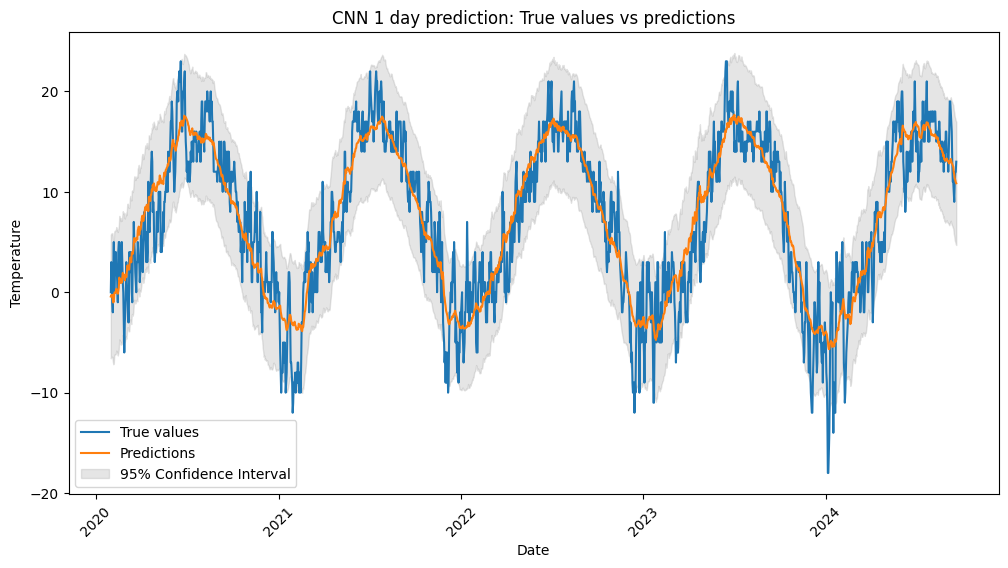

CNN 1 day MAE: 2.5032763514044665
CNN 1 day MSE: 9.866707555523288
CNN 1 day RMSE: 3.141131572462906
CNN 1 day Percentage of true values within confidence interval: 95.50827423167848%
CNN 1 day Percentage of predictions within margin of error: 24.408983451536642%


In [6]:
cnn_1_day_mae, cnn_1_day_mse, cnn_1_day_rmse, cnn_1_day_within_interval, cnn_1_day_within_margin = calculate_metrics_and_plot(predictions, y_test, test_date_output, 1)
print(f"CNN 1 day MAE: {cnn_1_day_mae}")
print(f"CNN 1 day MSE: {cnn_1_day_mse}")
print(f"CNN 1 day RMSE: {cnn_1_day_rmse}")
print(f"CNN 1 day Percentage of true values within confidence interval: {cnn_1_day_within_interval}%")
print(f"CNN 1 day Percentage of predictions within margin of error: {cnn_1_day_within_margin}%")

# 7 Day prediction

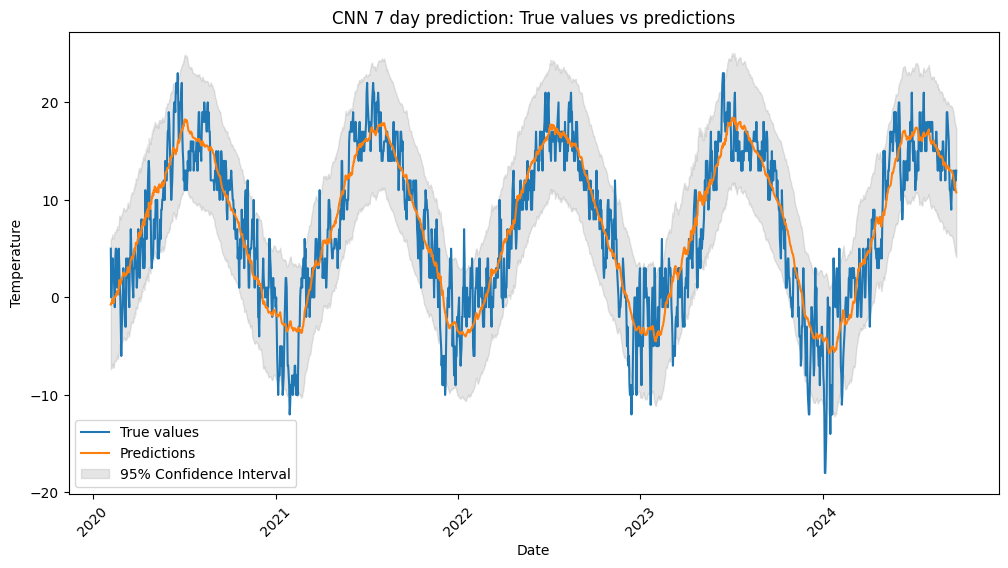

CNN 7 day MAE: 2.6863554747011205
CNN 7 day MSE: 11.503230842226088
CNN 7 day RMSE: 3.3916413198075777
CNN 7 day Percentage of true values within confidence interval: 94.79905437352247%
CNN 7 day Percentage of predictions within margin of error: 25.059101654846334%


In [7]:
cnn_7_day_mae, cnn_7_day_mse, cnn_7_day_rmse, cnn_7_day_within_interval, cnn_7_day_within_margin = calculate_metrics_and_plot(predictions, y_test, test_date_output, 7)
print(f"CNN 7 day MAE: {cnn_7_day_mae}")
print(f"CNN 7 day MSE: {cnn_7_day_mse}")
print(f"CNN 7 day RMSE: {cnn_7_day_rmse}")
print(f"CNN 7 day Percentage of true values within confidence interval: {cnn_7_day_within_interval}%")
print(f"CNN 7 day Percentage of predictions within margin of error: {cnn_7_day_within_margin}%")

# 30 Day prediction

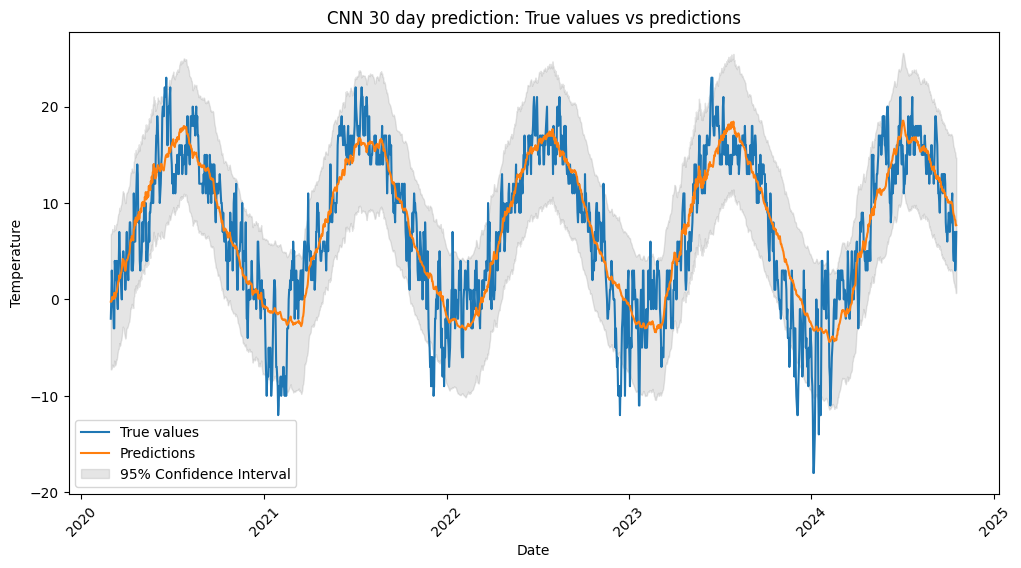

CNN 30 day MAE: 2.796137472048807
CNN 30 day MSE: 12.861943218900192
CNN 30 day RMSE: 3.5863551440006876
CNN 30 day Percentage of true values within confidence interval: 94.73995271867612%
CNN 30 day Percentage of predictions within margin of error: 22.163120567375884%


In [8]:
cnn_30_day_mae, cnn_30_day_mse, cnn_30_day_rmse, cnn_30_day_within_interval, cnn_30_day_within_margin = calculate_metrics_and_plot(predictions, y_test, test_date_output, 30)
print(f"CNN 30 day MAE: {cnn_30_day_mae}")
print(f"CNN 30 day MSE: {cnn_30_day_mse}")
print(f"CNN 30 day RMSE: {cnn_30_day_rmse}")
print(f"CNN 30 day Percentage of true values within confidence interval: {cnn_30_day_within_interval}%")
print(f"CNN 30 day Percentage of predictions within margin of error: {cnn_30_day_within_margin}%")

In [ ]:
spark.stop()